In [19]:
import pandas as pd

# 1. Carga del pergamino secreto
df = pd.read_csv('aptitudes_ninja.csv')
df


,fuerza_fisica,control_chakra,misiones_exito,nombre_sujeto
0,23.24,11.27,47,Ninja_133
1,31.63,83.80,74,Ninja_069
2,23.32,29.67,45,Ninja_107
3,19.65,26.14,45,Ninja_129
4,29.99,24.52,56,Ninja_123
...,...,...,...,...
145,94.11,96.60,18,Ninja_143
146,87.11,29.31,73,Ninja_002
147,12.18,17.48,3,Ninja_117
148,24.64,88.79,57,Ninja_053


In [20]:
# Verificar valores nulos
print(df.isnull().sum())

fuerza_fisica     0
control_chakra    0
misiones_exito    0
nombre_sujeto     0
dtype: int64


In [21]:
# Eliminar valores incoherentes
df = df[(df["fuerza_fisica"] >= 0) & (df["control_chakra"] >= 0)]

# Seleccionar variables numéricas relevantes
X = df[["fuerza_fisica", "control_chakra"]]

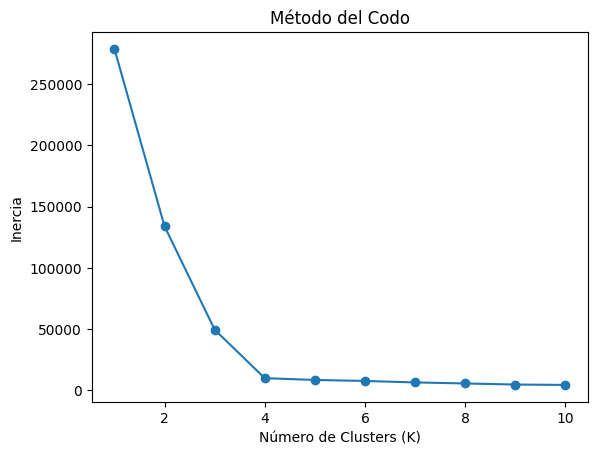

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo")
plt.show()

In [23]:
k_optimo = 4

modelo_final = KMeans(n_clusters=k_optimo, random_state=42)
df["cluster"] = modelo_final.fit_predict(X)

centroides = modelo_final.cluster_centers_

print("Centroides:")
print(centroides)

Centroides:
[[24.8148     25.8586    ]
 [35.136      90.42333333]
 [86.3155     30.05375   ]
 [94.43933333 93.33133333]]


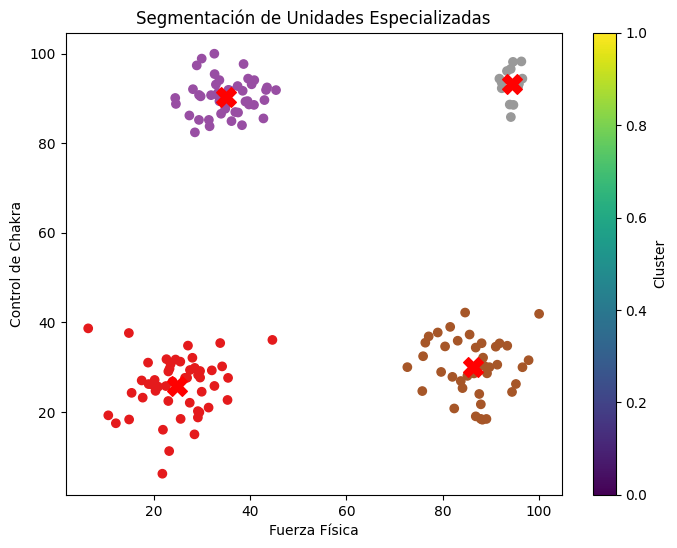

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(df["fuerza_fisica"],
            df["control_chakra"],
            c=df["cluster"],
            cmap="Set1")

# Dibujar centroides
plt.scatter(centroides[:, 0],
            centroides[:, 1],
            c='red',
            marker='X',
            s=200)

plt.xlabel("Fuerza Física")
plt.ylabel("Control de Chakra")
plt.title("Segmentación de Unidades Especializadas")

plt.colorbar(label="Cluster")
plt.show()